<a href="https://colab.research.google.com/github/abinavharsath41-ctrl/FOML-exp/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Machine learning/headbrain.csv'

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [ ]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values


In [ ]:
X = np.array(X)
Y = np.array(Y)

# Step 4: Calculate mean values
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Step 5: Compute regression coefficients using Least Squares
n = len(X)
numerator = np.sum(X * Y) - n * mean_x * mean_y
denominator = np.sum(X ** 2) - n * mean_x ** 2

w1 = numerator / denominator
w0 = mean_y - w1 * mean_x

# Step 6: Define linear function
def predict(x):
    return w0 + w1 * x

# Step 7: Predict values
Y_pred = predict(X)

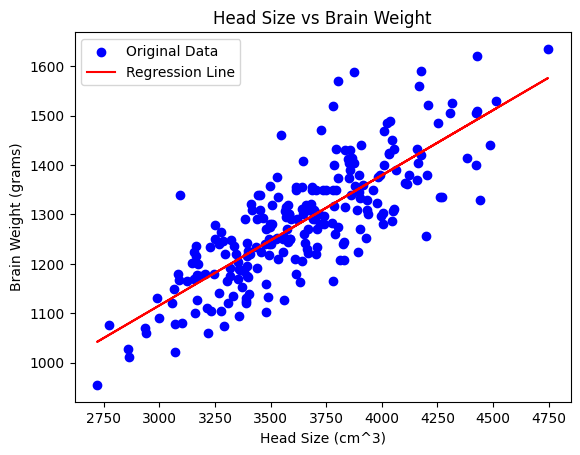

Mean Squared Error (MSE): 5201.38


In [ ]:
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.title('Head Size vs Brain Weight')
plt.show()

# Step 9: Calculate Mean Squared Error
mse = np.mean((Y - Y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.2f}")

In [ ]:
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, Y)
Y_pred_sklearn = model.predict(X_reshaped)

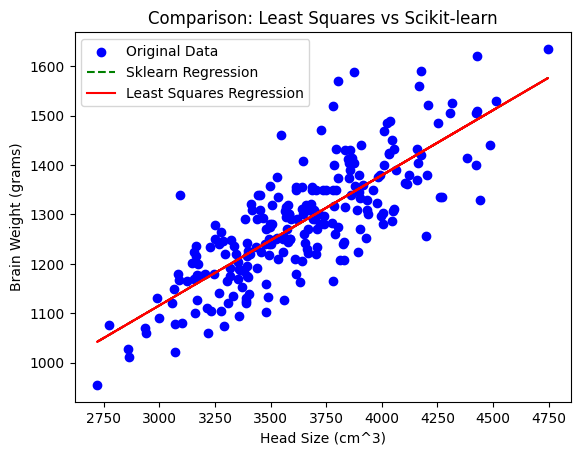

Scikit-learn Mean Squared Error: 5201.38


In [ ]:
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred_sklearn, color='green', linestyle='--', label='Sklearn Regression')
plt.plot(X, Y_pred, color='red', label='Least Squares Regression')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.title('Comparison: Least Squares vs Scikit-learn')
plt.show()

# MSE from sklearn model
mse_sklearn = np.mean((Y - Y_pred_sklearn) ** 2)
print(f"Scikit-learn Mean Squared Error: {mse_sklearn:.2f}")